<a href="https://colab.research.google.com/github/tusharagarwal25/skydock/blob/master/Tushar_CoRise_Week1_StudentVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part of the course: [Prompt Design & Building AI products](https://corise.com/go/ai-products-NHKQNR) and is created by Sidharth Ramachandran as the project for Week 1 of the course.

# Generate your own Podcast

Welcome to the project that is part of Week 1 of the course - Prompt Design & Building AI products. In this project, you are going to choose a book, topic, or paper of your choice & build your personlized podcast that discusses the key themes.

The entire project is divided into the following three steps:

1. Build the text corpus for the subject of your choice
2. Summarizing and identifying the key themes using an LLM
3. Generating a podcast conversation that discusses the key themes
4. Giving a voice to the podcast and putting everything together


# The Problem

For many users, consuming information via an audio stream is more convenient than reading text. Many households are already familiar with using audio to access information on the Internet through virtual assistants and smart speakers. While they work well for information snippets and specific tasks ("Alexa, please play a lullaby!"), a conversational style is more effective in presenting information in an accessible and enjoyable way. This is why podcasts as a medium have become so popular.

But what if you wanted to listen to a podcast based on your current interest. Listening to a conversation about the Chola dynasty in 9th century CE India would be an absolute delight although something like this doesn't exist. What if you could create a podcast for any topic that catches your fancy? What if it could also be personalized the way you like - maybe you are not into the details and prefer a summary. Maybe you would also be happy to hear some witty jokes during the conversation. Maybe you like to hear guests with a deep and calming voice. In this project, we will try to build just the podcast for you!

#Section 1: Build the text corpus for your topic of choice

You need to obtain the corpus of text content that will be the basis of your podcast. Depending on the topic you want to create a podcast about, there are several ways to collect the text. In the section below, we provide you with three options:

- PDF - text data from PDFs that are typically used for scientific papers, company reports, course notes and so on
- Wikipedia - the world encyclopedia
- Text files - more generic source that can take it any text file

One could argue that Large Language Models (LLMs) being world models, they would already have all the information on the topic we care about. But there are some reasons why it still makes sense to consider creating your own text corpus:
1. LLMs typically have a certain cut-off date (e.g. August 2021 for chatGPT) and are trained on data that is not updated since. Therefore, it's likely that they do not have information about events and developments since that date. They might still be able to generate accurate responses but we can be less confident of their accuracy.
2. There are also data sources that are private (like emails, personal journals, company powerpoints) that LLMs do not have access to but which we would still like to use as the basis for generating a personalized podcast.
3. Using our own text corpus allows us to leverage the technical capabilities of the LLM while bringing our own intelligence, creativity and personal preferences to the task.

## Source Type: PDF

This is one of the ways in which we can import knowledge that is typically not indexed by search engines and generally private in nature. During the project kick-off I used an example of the annual report of a company but I'm sure that you will use something that is far more interesting and exciting 😃

In [1]:
## Installing the necessary library to work with PDF
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 4.6 MB/s eta 0:00:00


We work with PDFs using the pypdf library. Provide the link to the URL to load the PDF.
If you only have a local copy of the PDF, then you can upload it to the Colab environment as shown in the two steps of the screenshot and then use the path of the uploaded file.

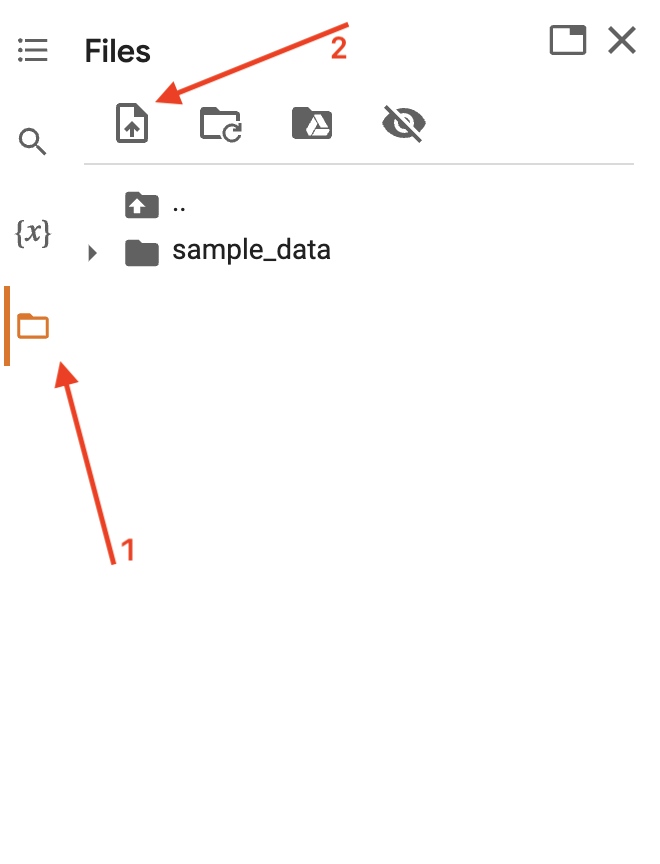

In [1]:
import requests
import io
from pypdf import PdfReader, PageRange

# Replace the URL below with the specific PDF URL you want to use
URL = "https://arxiv.org/pdf/2302.11382.pdf"
response = requests.get(URL)
response.raise_for_status()
remote_file_bytes = io.BytesIO(response.content)
reader = PdfReader(remote_file_bytes)

# Uncomment the below line and provide the path to the local PDF file you want to use
# reader = PdfReader("YOUR_PDF_LOCAL_PATH")

# Listing the number of pages in the PDF file
number_of_pages = len(reader.pages)
print (number_of_pages)

19


Depending on the number of pages and structure of your PDF, you may choose to only use a section of it. You can adapt the following code if you would like to pick certain sections of the PDF.

In [2]:
pages = PageRange('0:17').to_slice()
selected_pages = reader.pages[pages]

# in case you want to use the entire document
# selected_pages = reader.pages

In [3]:
pdf_input = ""
for page in selected_pages:
    pdf_input += page.extract_text() + "\n"

In [5]:
pdf_input

'arXiv:2302.11382v1  [cs.SE]  21 Feb 2023A Prompt Pattern Catalog to Enhance Prompt Engineering with ChatGPT\nJules White, Quchen Fu, Sam Hays, Michael Sandborn, Carlos O lea, Henry Gilbert,\nAshraf Elnashar, Jesse Spencer-Smith, and Douglas C. Schmi dt\nDepartment of Computer Science\nVanderbilt University, Tennessee\nNashville, TN, USA\n{jules.white, quchen.fu, george.s.hays, michael.sandbor n, carlos.olea, henry.gilbert,\nashraf.elnashar, jesse.spencer-smith, douglas.c.schmi dt}@vanderbilt.edu\nAbstract —Prompt engineering is an increasingly important\nskill set needed to converse effectively with large languag e models\n(LLMs), such as ChatGPT. Prompts are instructions given to a n\nLLM to enforce rules, automate processes, and ensure speciﬁ c\nqualities (and quantities) of generated output. Prompts ar e also\na form of programming that can customize the outputs and\ninteractions with an LLM.\nThis paper describes a catalog of prompt engineering tech-\nniques presented in pattern f

## Source Type: Wikipedia

Wikipedia is a great source for gathering information about history, current events, celebrities and so much more! It's a good starting point for our text corpus.

In [4]:
!pip install wikipedia

Let's confirm we can extract the content using Wikipedia's page about itself!

In [5]:
import wikipedia
print (wikipedia.summary("Wikipedia"))

The Wikimedia Foundation, Inc. (WMF) is an American 501(c)(3) nonprofit organization headquartered in San Francisco, California, and registered as a charitable foundation under local laws. Best known as the hosting platform for Wikipedia, a crowdsourced online encyclopedia, it also hosts other related projects and MediaWiki, a wiki software.The Wikimedia Foundation was established in 2003 in St. Petersburg, Florida, by Jimmy Wales as a nonprofit way to fund Wikipedia, Wiktionary, and other crowdsourced wiki projects that had until then been hosted by Bomis, Wales's for-profit company. The Foundation finances itself mainly through millions of small donations from Wikipedia readers, collected through email campaigns and annual fundraising banners placed on Wikipedia and its sister projects. These are complemented by grants from philanthropic organizations and tech companies, and starting in 2022, by services income from Wikimedia Enterprise.
The Foundation has grown rapidly throughout it

Using the Wikipedia library, we can get all the details of a certain Wiki page based on the title or the Wiki ID.

- Feel free to choose a topic of your choice and retrieve those information from the Wiki page

In [6]:
# Replace the Wiki page below with the name of the Wiki page you would like to use
input = wikipedia.page("1953 Iranian coup d'état", auto_suggest=False)

In [7]:
wiki_input = input.content
wiki_input

'The 1953 Iranian coup d\'état, known in Iran as the 28 Mordad coup d\'état (Persian: کودتای ۲۸ مرداد), was the U.S.- and UK-instigated, Iranian army-led overthrow of the democratically elected Prime Minister Mohammad Mosaddegh in favor of strengthening the monarchical rule of the shah, Mohammad Reza Pahlavi, on 19 August 1953. It was aided by the United States (under the name TP-AJAX (Tudeh Party) Project or "Operation Ajax") and the United Kingdom (under the name "Operation Boot"). The clergy also played a considerable role.Mosaddegh had sought to audit the documents of the Anglo-Iranian Oil Company (AIOC), a British corporation (now part of BP), to verify that AIOC was paying the contracted royalties to Iran, and to limit the company\'s control over Iranian oil reserves. Upon the AIOC\'s refusal to cooperate with the Iranian government, the parliament (Majlis) voted to nationalize Iran\'s oil industry and to expel foreign corporate representatives from the country. After this vote, 

In [28]:
print (len(wiki_input))

74881


## Source Type: Generic Text File

In order to provide an even more generic option, we consider loading information of a book from Project Gutenberg which is available in the form of a text file. This can easily cover almost any other text based source of knowledge.

Please replace the book of your choice by browsing through the Porject Gutenberg library.

In [ ]:
import requests

def get_gutenberg_text(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    raw_text = response.text

    start_delimiter = "*** START OF THE PROJECT GUTENBERG EBOOK"
    end_delimiter = "*** END OF THE PROJECT GUTENBERG EBOOK"

    start_index = raw_text.find(start_delimiter)
    end_index = raw_text.find(end_delimiter)

    if start_index == -1 or end_index == -1:
        raise ValueError("Could not find start or end delimiter in the text.")

    start_index = raw_text.find("\n", start_index) + 1
    end_index = raw_text.rfind("\n", 0, end_index)

    return raw_text[start_index:end_index]

In [ ]:
# Replace the URL below with the specific Project Gutenberg book URL you want to read
book_url = "YOUR_BOOK_OF_CHOICE"
book_input = get_gutenberg_text(book_url)

print(book_input[:500])  # Print the first 500 characters of the book

In [ ]:
print (len(book_input))

## Understanding Tokens & the Context Window

You might have noticed that at the end of each type of data source we also checked how large it is. This might be number of pages in a PDF or how long the text was in the case of text from Wikipedia or Project Gutenberg.  

This is important because when working with LLMs, you must remember that each model-type has a restricted **context window**. This is the amount of text that you can use in the prompt for that model-type. For e.g. `text-davinci-003` and `gpt-3.5-turbo` can accept a maximum input of 4096 tokens whereas newer models like `gpt-4` can take upto 32k tokens (this API is still not public and has a waitlist). The pricing of requests to the OpenAI API is also based on the number of tokens, for e.g. `gpt-3.5-turbo` costs $0.002 / 1K tokens.

### But what are tokens?

Tokens are the level at which these LLMs operate. They are trained to predict the next token in order to complete the sentence and so could be viewed as analogous to words. However, this is not completely accurate as tokens can also be parts of words. Let's use the `tiktoken` library from OpenAI to see how an example sentence would be tokenized and also use that to estimate the total number of tokens in our input text.

In [8]:
!pip install tiktoken

In [9]:
import tiktoken
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")
token_list = enc.encode("Uplimit is amazing!")

In [13]:
token_list

[52, 501, 2408, 374, 8056, 0]

In [10]:
for token in token_list:
  print ("Token ", str(token), " decodes to ", enc.decode([token]))

Token  52  decodes to  U
Token  501  decodes to  pl
Token  2408  decodes to  imit
Token  374  decodes to   is
Token  8056  decodes to   amazing
Token  0  decodes to  !


So we can see that the way OpenAI tokenizes our text is not exactly analogous to words as the word - "CoRise" has been tokenized into three tokens - "Co", "R" & "ise". The way that a model tokenizes our text impacts how many tokens and therefore the length of text that can be accepted in a single API request as well as the pricing -> more token, more the cost!

Let's determine the number of tokens in our text corpus.

In [11]:
## Please the variable as pdf_input, wiki_input, or book_input based on your choice
print ("Number of tokens in corpus ", len(enc.encode(wiki_input)))

Number of tokens in corpus  16134


Books are normally quite long and we should expect a large number of tokens, certainly beyong the context window of 4096 tokens! In comparison, we might expect a smaller number of tokens for Wikipedia articles or selected pages from a PDF.

We need to consider that in addition to the input text, we will also have to add the the Prompt that will provide instructions to the LLM. This is not considered a separate field and is counted towards the context window. Therefore, we need to find a way to deal with input texts that exceed the token limit.

What would happen if we do not handle these scenarios - it would result in the tokens at the end of our content being cut-off and not actually sent in the request to the LLM. Depending on the use-case this may or may not have critical implications.

We will design a series of steps that will split the input text into multiple chunks that satisfy the prompt limit. This also means that we will have to make multiple requests to the API and then collate all the responses after all responses have been received.

We will start by splitting the input text into logical sub-parts - sentences with the help of the NLTK library.

In [30]:
input_text =

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def split_text (input_text):
  split_texts = sent_tokenize(input_text)
  return split_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Once the entire input text has been broken up into sentences we now join them up in such a way that we create chunks for each prompt. We keep adding sentences to a prompt chunk till we reach the max token length for that prompt. We set the max_token_len = 2000 in this case to ensure that we have enough spare room for our prompt instruction.

In [13]:
def create_chunks(split_sents, max_token_len=2000):
  current_token_len = 0
  input_chunks = []
  current_chunk = ""
  for sents in split_sents:
    sent_token_len = len(enc.encode(sents))
    if (current_token_len + sent_token_len) > max_token_len:
      input_chunks.append(current_chunk)
      current_chunk = ""
      current_token_len = 0
    current_chunk = current_chunk + sents
    current_token_len = current_token_len + sent_token_len
  if current_chunk != "":
    input_chunks.append(current_chunk)
  return input_chunks

In [21]:
some_interesting_covert_stories = """
 Certainly. The 1953 Iranian coup d'état was rife with cloak-and-dagger maneuvers, intelligence ploys, and clandestine operations. Here are some of the most notable stories and instances that reveal the intricacies of how the coup was orchestrated:

1. **Kermit Roosevelt Jr. in Disguise**: As the CIA's lead agent on the ground, Roosevelt operated undercover, often in disguise. On one occasion, he posed as a German archaeologist. Throughout the operation, Roosevelt was instrumental in distributing funds to stir up anti-Mosaddegh sentiment and organizing pro-Shah protests. His ability to move incognito and rally influential figures against Mosaddegh was pivotal to the coup's success.

2. **Operation Ajax & The BBC Broadcast**: The BBC's Persian radio service began its broadcast with the line "it is now midday in London", which was a prearranged signal to launch the coup. This is a testament to how deeply integrated foreign involvement was, co-opting even international media outlets.

3. **Stirring Religious Sentiments**: Roosevelt and his agents successfully employed psychological warfare. They spread false reports and rumors suggesting that Mosaddegh was going to abolish the Muslim call to prayer and implement a secular republic, stirring conservative religious figures against him.

4. **Fake Communist Uprising**: One of the most audacious ploys was creating the perception of a communist threat. CIA agents funded and orchestrated faux Tudeh (communist) party protests, thereby legitimizing the narrative that Mosaddegh was leading Iran into the Soviet fold. This tactic was aimed at convincing the Iranian public and the world that Mosaddegh was a dangerous communist or at least someone who couldn't prevent a communist takeover.

5. **Bribes and Newspapers**: A substantial portion of the CIA's budget for Operation Ajax was used for bribes. They bought off Iranian journalists, newspaper editors, and other influential figures. These media figures played their part by publishing anti-Mosaddegh propaganda, painting him as a communist, a Jew, or as someone betraying Iran.

6. **Mobilizing the Street**: Using the funds, agents on the ground paid gangsters and thugs to create chaos, including destroying religious statues and blaming it on Mosaddegh, further agitating religious conservatives. Roosevelt himself described how he led a crowd toward Parliament, giving a signal to start the riot, leading to full-blown chaos that would later be used as a justification for Mosaddegh's removal.

7. **The Failed First Attempt**: Before the successful coup, there was a botched attempt. General Fazlollah Zahedi, handpicked by the CIA and MI6 as Mosaddegh's replacement, tried to execute the coup, but Mosaddegh got wind of it. The Shah fled to Italy thinking all was lost. Roosevelt, however, decided to stay and, in a few intense days, turned the situation around, leveraging the networks they had built.

These episodes from the 1953 coup shed light on the depths of subterfuge, intelligence trickery, and the influence of covert operations in reshaping nations' destinies. The orchestration of the coup was not merely a political maneuver but involved manipulating public perception, media narratives, and religious sentiments.
"""

You can try the splitting function on the input text that you have created to see what happens.

In [27]:

wiki_input = wiki_input + some_interesting_covert_stories
split_sents = split_text(wiki_input)
input_chunks = create_chunks(split_sents, max_token_len=14000)

In [26]:
len(input_chunks)

2

Identify how many chunks you have created and ensure that a chunk has not been trimmed at the middle of a sentence. We will move towards the next step of summarizing this information.

# Section 2: Summarizing the text corpus using an LLM

In this section we will design a prompt for the LLM to take in the input text corpus and create a summary. We do this to identify the key themes and highlights of the chosen topic so that we can subsequently generate the podcast script based on that.

Keep in mind that a generic summary will probably be too short and not have enough context to explore in a podcast discussion.

Please create an account with OpenAI that will allow us to access the API by visiting this [link](https://platform.openai.com) and creating an account with a method of your choice. Once created, please naviagate to the `Manage Accounts` section of your profile and look-up the `Usage` tab. By default, most new accounts automatically get $18 of credit to try the API and this should be enough for the purposes of this project.

Please also visit the `API Keys` tab and Create a new secret key and copy this and keep it available. We will use this API key in subsequent steps while making the API calls.

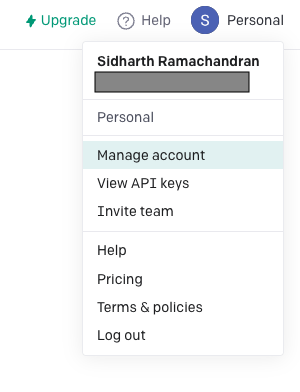


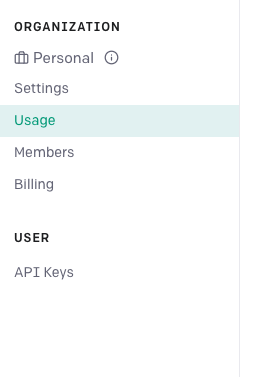

While we can use the API and make calls directly, it's much easier to work with the Python library provided by OpenAI called - `openai` 🤭. Let's install the package and also test whether it works with our API key.

In [16]:
!pip install openai

Please paste *your* API credentials in the field specified below:

In [17]:
import openai
from getpass import getpass

openai.api_key = getpass('enter your openAI key')

enter your openAI key··········


In [19]:
# we can confirm that the API key works by listing all the OpenAI models
# we will be using the gpt-3.5-turbo version for this project
models = openai.Model.list()
for model in models["data"]:
  print (model["root"])

davinci
gpt-3.5-turbo-16k-0613
text-davinci-001
text-search-curie-query-001
babbage
text-babbage-001
gpt-3.5-turbo-16k
curie-instruct-beta
davinci-similarity
code-davinci-edit-001
text-similarity-curie-001
ada-code-search-text
text-search-ada-query-001
babbage-search-query
ada-similarity
text-curie-001
text-search-ada-doc-001
text-search-babbage-query-001
code-search-ada-code-001
curie-search-document
davinci-002
gpt-3.5-turbo-0613
text-search-davinci-query-001
text-search-curie-doc-001
babbage-search-document
babbage-002
babbage-code-search-text
text-embedding-ada-002
gpt-3.5-turbo
davinci-instruct-beta
davinci-search-query
text-similarity-babbage-001
text-davinci-002
code-search-babbage-text-001
text-search-davinci-doc-001
code-search-ada-text-001
ada-search-query
text-similarity-ada-001
ada-code-search-code
whisper-1
text-davinci-edit-001
davinci-search-document
curie-search-query
babbage-similarity
ada
ada-search-document
text-ada-001
text-similarity-davinci-001
curie-similarity
ba

**Instructing chatGPT to create a summary from our source text corpus**

We are at the point where we have created chunks for our source text and now it's time to work with chatGPT to generate the summary for our podcast. Please fill in the text prompt below:

- Keep in mind that you don't want just a regular summary - there should be enough information to create a podcast conversation
- Keep in mind that information is returned in a structured way so that you can easily parse and re-use for the next step

**HINT**: You can try and run your prompts first using the [chatGPT Web interface](https://chat.openai.com/) to see how it's working. This is manual because you will have to copy-paste the actual text information but you will save up on the cost of tokens compared to running it via the API.

In [45]:
instructPrompt = """
You are given a wikipedia article for 1953 Iranian coup d'état.
You need to create a detailed summary for the coup keeping in mind that the summary should be rich enough
to be used in a college thesis.

Your summary should have the following sections atleast:
1. Geopolitical context and background.
2. Tensions prevailing
3. Motivations for the coup
4. Planning the coup
5. People involved from both sides
6. Chronologically order of events as they happenend
7. Classified information and interesting anecdotes.
8. Details of one story from the coup: Keep this long
9. Results and aftermath
10. Predicaments and retrospective reflections
The summary generated would be used to create a podcast, so please make sure to include some well known instances or stories from the coup from the article, or by yourself, if they aren't available in the article.

The article is shared below:
"""

In [46]:
requestMessages = []
for text in input_chunks:
  requestMessage = instructPrompt + '\n' + text
  requestMessages.append(requestMessage)

In [47]:
chatOutputs = []
import time
for request in requestMessages:
  chatOutput = openai.ChatCompletion.create(model="gpt-3.5-turbo-16k",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": request}
                                                      ]
                                            )
  time.sleep(10)
  chatOutputs.append(chatOutput)

In [48]:
# podcastFacts = ""
# for chats in chatOutputs:
#   podcastFacts = podcastFacts + chats.choices[0].message.content

podcastFacts = chatOutputs[0].choices[0].message.content

In [49]:
print(podcastFacts)

1. Geopolitical context and background:
- Iran was caught between two advancing imperial powers, Russia and Britain, in the 19th century.
- Britain had a strong influence on Iran during the early 20th century with the Anglo-Iranian Oil Company (AIOC) controlling the country's oil industry.
- In 1951, Iran's Prime Minister Mohammad Mosaddegh sought to nationalize the oil industry, which was met with opposition from Britain and the West.
- The Cold War context also played a role, with the U.S. fearing a communist takeover in Iran and wanting to prevent Soviet influence in the region.

2. Tensions prevailing:
- The tensions revolved around the control and nationalization of Iran's oil industry.
- Mosaddegh's move to nationalize the oil industry threatened British interests and control over Iranian oil resources.
- The economic boycott imposed by Britain worsened the economic situation in Iran, leading to popular discontent and loss of support for Mosaddegh.
- The opposition to Mosaddegh w

The above output should be a list of all important facts, themes or other highlights from your topic that you would like to be covered in the podcast conversation

# Section 3: Generating a podcast conversation script from the summarized text corpus using an LLM

We have the key highlights/facts from the text corpus. We would like to weave a podcast conversation around this and generate a podcast script.

You can be as creative as you like and here are some options that you can use when constructing your prompt -  
- Introduce the speakers - give them names (celebrities perhaps?)
- Would you like to assign a personality to your speakers? Include details when setting the context in your prompt
- Add some information to have a gentle introduction - maybe an ice-breaker?
- Then provide instructions for how the conversation should proceed - who asks the questions, how does the other speaker respond?
- Keep in mind that you will use this output in the next step to generate voices, so have a way to identify the different speakers in the conversation

**Helpful Hints**

- In order to avoid using up a lot of your tokens it makes sense to start with only one chunk at a time and run experiments with your prompt. Once satisfied with the outcomes, then extend this to include all the chunks.
- Remember that in the next section, you are going to use a method to generate voices for the generated script. Therefore you should have a way to identify the speaker of each line of text so that you can generate the voice easily
- One of the possible ways to format the output of this section is as follows:

>Sid: Hey Darren, what are you drinking right now?
>
>Darren: Just some water. What about you?
>
>Sid: Oh, I've got a hot cup of coffee here. Can't function without it!
>
>Darren: Same here! So, what's new in the business world?

- Once you run this section for a small chunk, please take a look at Section 3A next to get some further ideas on how to structure the response from the LLM so that the text to speech module (Section 4) can be run easily.

- Our recommendation would be to test this end to end for a small chunk of your podcast first before running it on a large corpus.

In [52]:
podcastPrompt = """
Generate a single script for a podcast between Morris (the podcast host) and Chris (former director at CIA).
Please use the following structure:
Morris: <text>
Chris: <text>
and so on.

You are provided a detailed summary of a geo-political event called : 1953 Iranian coup d'état.

Morris wants the listeners to understand and appreciate one of the most successful covert operations carried out by CIA
He peels of the layers of the story by asking relevant questions from Chris.
Chris, speaks with poise and gives out detailed versions of events as they unfolded, often enthusiastically and with pride.
Both maintain a healthy flow of information.
Make sure this is a conversation and not a question answer like script.
The tone of the podcast is intriguing and one that captures the readers interest.
Keep out dates and numbers if necessary. Dont go into lengthy texts outlining baritone information.
Between Chris and Morris, Chris is the one who speaks more when asked questions.
"""

In [53]:
requestMessage = podcastPrompt + podcastFacts
requestMessage

"\nGenerate a single script for a podcast between Morris (the podcast host) and Chris (former director at CIA). \nPlease use the following structure:\nMorris: <text>\nChris: <text>\nand so on.\n\nYou are provided a detailed summary of a geo-political event called : 1953 Iranian coup d'état.\n\nMorris wants the listeners to understand and appreciate one of the most successful covert operations carried out by CIA \nHe peels of the layers of the story by asking relevant questions from Chris. \nChris, speaks with poise and gives out detailed versions of events as they unfolded, often enthusiastically and with pride.\nBoth maintain a healthy flow of information.\nMake sure this is a conversation and not a question answer like script.\nThe tone of the podcast is intriguing and one that captures the readers interest. \nKeep out dates and numbers if necessary. Dont go into lengthy texts outlining baritone information.\nBetween Chris and Morris, Chris is the one who speaks more when asked quest

In [54]:
finalOutput = openai.ChatCompletion.create(model="gpt-3.5-turbo-16k",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": requestMessage}
                                                      ]
                                            )

In [55]:
podcastScript = finalOutput.choices[0].message.content

In [56]:
print (podcastScript)

[Opening music fades]

Morris: Welcome back to another episode of "Hidden Histories," where we delve into the secrets and intrigues that have shaped our world. Today, we have a fascinating story to share – the 1953 Iranian coup d'état. Joining me is Chris, a former director at the CIA and an expert on covert operations. Chris, thank you for being here.

Chris: It's my pleasure, Morris. This is one of the most captivating stories of espionage and geopolitics, and I'm excited to share it with your listeners.

Morris: Let's set the stage, Chris. What was the geopolitical context and background that led to the tensions in Iran during that time?

Chris: Morris, Iran found itself caught between two advancing imperial powers, Russia and Britain, in the 19th century. By the early 20th century, Britain had a strong influence on Iran with the Anglo-Iranian Oil Company controlling the country's oil industry. But in 1951, Iran's Prime Minister Mohammad Mosaddegh sought to nationalize the oil indus

Check the output script that your prompt generated and make necessary changes if required. Prompt design is iterative in nature and don't be shy to explore different styles.

## Section 3A: Repeating the podcast generation but this time to get a structured response using 'Function Calling'.

- In the previous section, we provided some hints on how you can structure the output response so that you can easily call the text to speech API in Section 4. The solution was to have each sentence spoken by each person in a new line and with the name of the host mentioned.
- In this section, we will look at an alternative way to format the output which leverages the newly introduced "**Function Calling**" capability to return the podcast script in a structured JSON object.
- This can make it even easier in calling the subsequent function to generate the audio for the podcast.

There are a couple of changes to keep in mind when using this style of prompting the model:

1. You might need to use the larger 16k gpt-3.5-turbo model to accomodate the additional tokens that are generated as a result of the JSON formatting
2. You can change the name of the hosts of the podcast to the names of the actual voices you want to use. This may not be very obvious when you're first reading this section, so we would recommend reading through to Section 4 and and then revisiting this idea.

In [67]:
podcastPrompt = """
Generate a single script for a podcast between Arnold (the podcast host) and Ryan (former director at CIA).
You are provided a detailed summary of a geo-political event called : 1953 Iranian coup d'état.

Arnold asks relevant questions to which Ryan answers, giving out detailed information.
Both maintain a healthy flow of conversation with Ryan giving out information and Arnold asking relevant questions.
The tone of the podcast is intriguing and one that captures the readers interest.

Keep out dates and numbers if necessary. Dont go into lengthy texts outlining baritone information.
Between Ryan and Arnold, Ryan is the one who speaks more when asked questions. Arnold doesn't have much knowledge of the events, and only asks follow up questions

Try to include some ploys to capture listener's interest.

Here is a detailed summary of the events that unfolded.

"""

In [68]:
requestMessage = podcastPrompt + podcastFacts
requestMessage

"\nGenerate a single script for a podcast between Arnold (the podcast host) and Ryan (former director at CIA). \nYou are provided a detailed summary of a geo-political event called : 1953 Iranian coup d'état.\n\nArnold asks relevant questions to which Ryan answers, giving out detailed information.\nBoth maintain a healthy flow of conversation with Ryan giving out information and Arnold asking relevant questions.\nThe tone of the podcast is intriguing and one that captures the readers interest. \n\nKeep out dates and numbers if necessary. Dont go into lengthy texts outlining baritone information.\nBetween Ryan and Arnold, Ryan is the one who speaks more when asked questions. Arnold doesn't have much knowledge of the events, and only asks follow up questions\n\nTry to include some ploys to capture listener's interest.\n\nHere is a detailed summary of the events that unfolded.\n\n1. Geopolitical context and background:\n- Iran was caught between two advancing imperial powers, Russia and B

In [69]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-16k",
    messages=[{"role": "user", "content": requestMessage}],
    functions=[
        {
        "name": "generate_podcast_audio",
        "description": "Use the podcast script to generate audio using a text to speech service. Identify the speakers properly and seperate them while giving the output",
        "parameters": {
            "type": "object",
            "properties": {
                "podcast_dialogues": {
                    "type": "array",
                    "description": "An array of podcast dialogues containing the speaker name and their dialogue or text",
                    "items": {
                        "type": "object",
                        "properties": {
                            "podcast_host_name": {
                                "type": "string",
                                "description": "The name of the podcast host who is speaking the dialogues in the podcast"},
                            "podcast_script_text": {
                                "type": "string",
                                "description": "The specific dialogue or text spoken by the podcast host"}
                            }
                        }
                    }
                },
            "required": ["podcast_dialogues"],
        },
    }],
  function_call={"name": "generate_podcast_audio"}
  )

Let's take a look at the completion response. You should notice the entire response as well as the function_call argument with the correctly formatted podcast dialogues and speaker information in the form of a JSON array.

In [71]:
print(completion.choices[0].message.function_call.arguments)

{
  "podcast_dialogues": [
    {
      "podcast_host_name": "Arnold",
      "podcast_script_text": "Welcome to today's podcast episode. Today, we have a captivating story that unfolds in the realm of geopolitics. Joining us is Ryan, a former director at the CIA, who will shed light on the intriguing events of the 1953 Iranian coup d'état. Ryan, thank you for being here."
    },
    {
      "podcast_host_name": "Ryan",
      "podcast_script_text": "Thank you, Arnold. It's a pleasure to be here and discuss such a pivotal moment in history."
    },
    {
      "podcast_host_name": "Arnold",
      "podcast_script_text": "Let's start with some background. Iran found itself caught between two advancing imperial powers in the 19th century, Russia and Britain. How did this shape the geopolitical context?"
    },
    {
      "podcast_host_name": "Ryan",
      "podcast_script_text": "Absolutely, Arnold. Iran was indeed a battleground for these two powers. Britain had a strong influence over Iran

# Section 4 - Generating the voice and putting the podcast together

We choose to perform the voice generation using voices from 11Labs (11.ai). They are a startup that provide realistic voices with the right intonation while speaking. They also offer the possibility to train your own voice (using the Studio/Web version but you can choose from the multiple options available to start with.

In order to sign-up, please visit this [link](https://beta.elevenlabs.io/) and create an account. Every new account receives free credits to run voice generations for upto 10k words which should fit well for the purposes of this project. Once the sign-up is complete, please click on the Account name and `Profile` tab from where you can copy the API key.

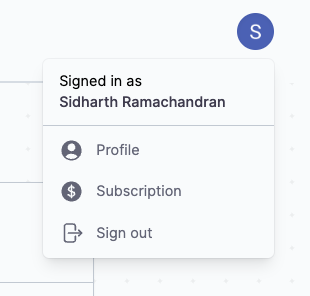

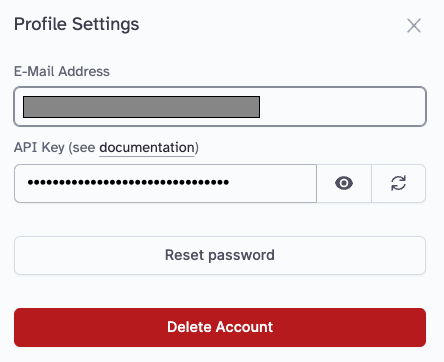

In [61]:
!pip3 install elevenlabs

In [62]:
!pip3 install typing-extensions --upgrade


In [63]:
from elevenlabs import set_api_key

set_api_key(getpass('Enter your ELEVEN_LABS_API_KEY '))

Enter your ELEVEN_LABS_API_KEY ··········


You can select from a list of speakers that are offered by Eleven Labs as listed [here](https://beta.elevenlabs.io/) in their demo dropdown. Hit the play button to hear the voice and choose a speaker that appeals to you!

## If you followed the instructions in Step 3, you should use the following set of functions.

In order to perform the voice generation, you can use the method below. This assumes that each line of the input text is spoken by a different person and the person's name is also part of the text itself. Please ensure that the output of your podcast script fits this style or else feel free to adjust the method.

Once you have selected the speaker voices then please make changes below to specify the name of the speakers you chose while generating the podcast script. This will ensure those names are actually removed before the dialogue is spoken!

In [65]:
from elevenlabs import generate

def createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2):
  genPodcast = []
  podcastLines = podcastScript.split('\n\n')
  podcastLineNumber = 0
  for line in podcastLines:
    if podcastLineNumber % 2 == 0:
      speakerChoice = speakerChoice1
      line = line.replace(speakerName1+":", '')
    else:
      speakerChoice = speakerChoice2
      line = line.replace(speakerName2+":", '')
    genVoice = generate(text=line, voice=speakerChoice, model="eleven_monolingual_v1")
    genPodcast.append(genVoice)
    podcastLineNumber += 1
  return genPodcast

In [66]:
speakerName1 = "Morris"
speakerChoice1 = "Arnold"
speakerName2 = "Chris"
speakerChoice2 = "Ryan"
genPodcast = createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2)

KeyboardInterrupt: ignored

In [ ]:
type(genPodcast)

In [ ]:
with open("/content/sample_data/genPodcast.mpeg", "wb") as f:
  for pod in genPodcast:
    f.write(pod)

With the previous step, you will find the generated podcast available in the folder section on the left bar of Google Colab (refer to the screenshot where you uploaded the PDF file).

## If you followed the set of instructions in Section 3A, then you can use the following set of functions.

What you will notice as the major difference from the functions above is that we now have a unified function that just takes in the JSON output from the LLM. This JSON response is (hopefully) well structured and has the voice information and the dialogue text. This ensures that we do not need to perform complicated line by line processing.

**Added 9/2/2023:**

One hint that I can provide for others facing this issue is to re-use/re-purpose a part of the previous function `createPodcast`. Specifically, in that function we replace the `speakerName` (the name of the podcast host) with speakerChoice (the name of the voice you want to use). You can reuse this line of code:

`line = line.replace(speakerName1+":", '')`

where `speakerName1` is the name of the podcast host showing up in the generated script.

In [82]:
import json
from elevenlabs import generate

def generate_podcast_audio(podcastScript):
  genPodcast = []
  speakerChoice = ""
  function_args = json.loads(podcastScript)
  for item in function_args['podcast_dialogues']:
    genVoice = generate(text=item['podcast_script_text'], voice=item['podcast_host_name'], model="eleven_monolingual_v1")
    genPodcast.append(genVoice)
  return genPodcast

In [ ]:
genPodcast = generate_podcast_audio(completion.choices[0].message.function_call.arguments)

In [74]:
type(genPodcast)

list

In [75]:
with open("/content/sample_data/genPodcast.mpeg", "wb") as f:
  for pod in genPodcast:
    f.write(pod)

With the previous step, you will find the generated podcast available in the folder section on the left bar of Google Colab (refer to the screenshot where you uploaded the PDF file).
All your generated recordings are also available on https://beta.elevenlabs.io/history but this can be a bit buggy at times so I would highly recommend that you save and download your generated audio file as well.

# Enjoy your very own podcast

I'm sure that you will notice several interesting aspects:
- Intonation like the Ah, Hmm etc.
- Notice when it might get things wrong as well!